In [8]:
from Linear import *
from mltools import *
from Loss import *
import numpy as np
from sklearn.model_selection import train_test_split

## Modele Lineaire sur les mélanges de données 2-gaussienne

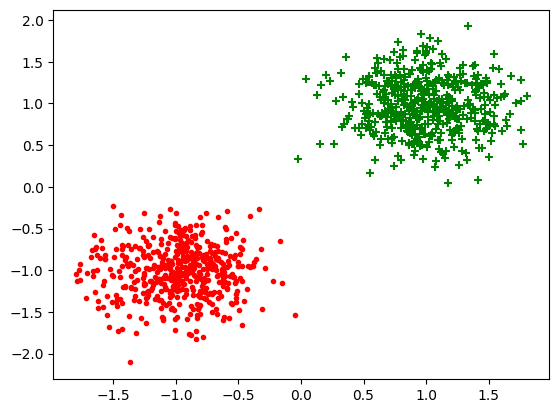

In [9]:
datax,datay= gen_arti(nbex=1000, data_type=0, epsilon=0.02)
plot_data(datax,datay)

Accuracy en train : 1.0
Accuracy en test : 1.0


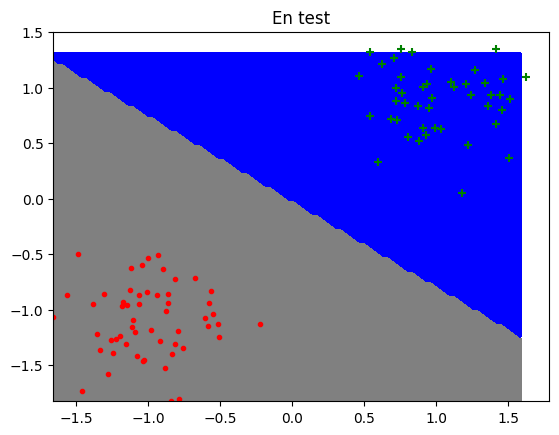

In [10]:
#datax,datay= gen_arti(nbex=1000, data_type=0, epsilon=0.02)
trainx,testx,trainy,testy = train_test_split(datax, datay,train_size=0.9)
n = trainx.shape[1]
d = trainy.shape[1]

trainy = np.where(trainy == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

### Paramètres
iteration = 100
gradient_step = 1e-4
loss = MseLoss()
model_lin= Linear(n, d, bias=True)

### Algorithme
losses = []
for _ in range(iteration):
    # forward
    prediction= model_lin.forward(trainx)
    # backward
    loss_back = loss.backward(trainy,prediction)
    losses.append(loss_back.mean())
    delta_linear = model_lin.backward_delta(trainx, loss_back)
    model_lin.backward_update_gradient(trainx, loss_back)
    model_lin.update_parameters(gradient_step)
    model_lin.zero_grad()

def predict(X):
    hidden = model_lin.forward(X)
    return np.where(hidden >= 0.5, 1, 0)

score_train = (trainy == predict(trainx)).mean()
score_test = (testy == predict(testx)).mean()
print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")



plot_frontiere(testx, predict, step=100)
plot_data(testx, testy.reshape(-1))
plt.title("En test")
plt.show()

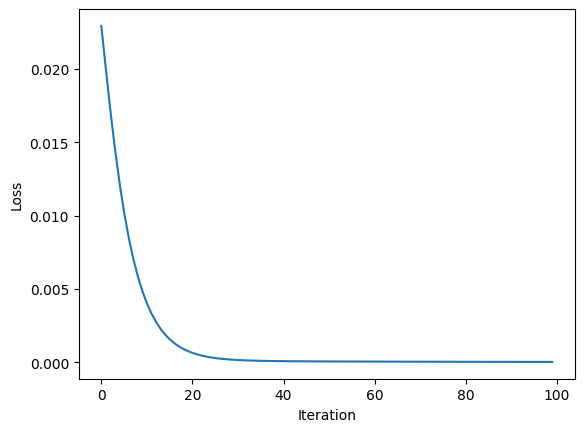

In [11]:
plt.plot(np.arange(iteration), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Modele Lineaire sur les mélanges de données 2-gaussienne avec bruit

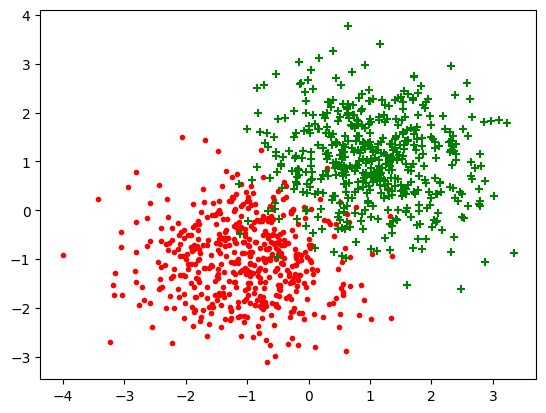

In [12]:
datax,datay= gen_arti(nbex=1000, data_type=0, epsilon=0.8)
plot_data(datax,datay)

Accuracy en train : 0.96
Accuracy en test : 0.97


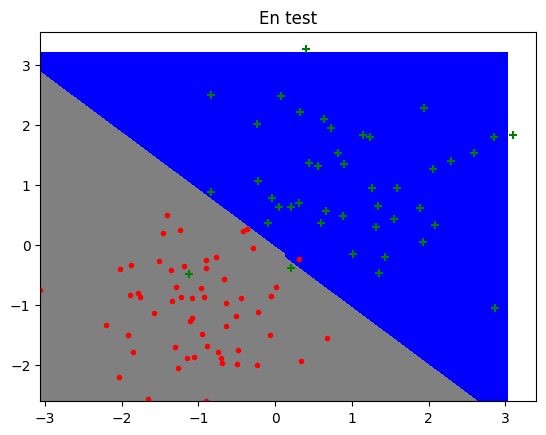

In [13]:
trainx,testx,trainy,testy = train_test_split(datax, datay,train_size=0.9)
n = trainx.shape[1]
d = trainy.shape[1]

trainy = np.where(trainy == -1, 0, 1).reshape((-1, 1))
testy = np.where(testy == -1, 0, 1).reshape((-1, 1))

iteration = 100
gradient_step = 1e-4
loss = MseLoss()
model_lin= Linear(n, d, bias=True)

### Algorithme
losses = []
for _ in range(iteration):
    # forward
    prediction= model_lin.forward(trainx)
    # backward
    loss_back = loss.backward(trainy,prediction)
    losses.append(loss_back.mean())
    delta_linear = model_lin.backward_delta(trainx, loss_back)
    model_lin.backward_update_gradient(trainx, loss_back)
    model_lin.update_parameters(gradient_step)
    model_lin.zero_grad()

def predict(X):
    hidden = model_lin.forward(X)
    return np.where(hidden >= 0.5, 1, 0)

score_train = (trainy == predict(trainx)).mean()
score_test = (testy == predict(testx)).mean()
print(f"Accuracy en train : {score_train}")
print(f"Accuracy en test : {score_test}")

plot_frontiere(testx, predict, step=100)
plot_data(testx, testy.reshape(-1))
plt.title("En test")
plt.show()

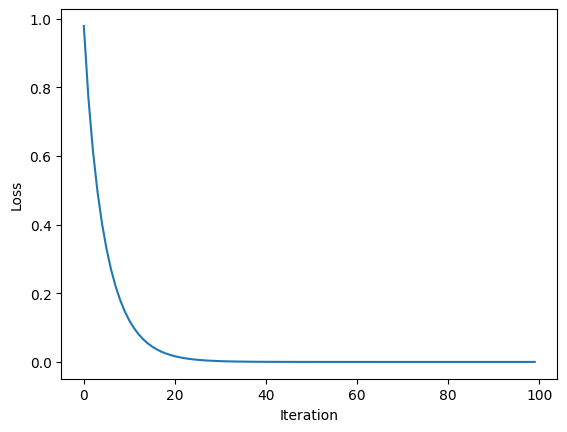

In [14]:
plt.plot(np.arange(iteration), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()